In [2]:
from numpy import *
from matplotlib.pyplot import *
import random

In [3]:
#1
def reverse(list):
    return(list[::-1])
reverse([1,2,3,4])

[4, 3, 2, 1]

In [4]:
#2
def average(list):
    return(sum(list)/len(list))
average([1,2,3,4,5])

3.0

In [5]:
#3
def f(el,l):
    return el in l
f(5,[1,2,3])

False

In [6]:
#4
def mult(i,k):
    for j in range(0,k+1):
        print(i,"x",j,"=",i*j)
mult(2,17)

2 x 0 = 0
2 x 1 = 2
2 x 2 = 4
2 x 3 = 6
2 x 4 = 8
2 x 5 = 10
2 x 6 = 12
2 x 7 = 14
2 x 8 = 16
2 x 9 = 18
2 x 10 = 20
2 x 11 = 22
2 x 12 = 24
2 x 13 = 26
2 x 14 = 28
2 x 15 = 30
2 x 16 = 32
2 x 17 = 34


In [7]:
#5
def g(i):
    return(4*((-1)**(i+1))/(2*i-1))
aa = [g(i) for i in range(1,10**5+1)]
sum(aa)

3.141582653589792

In [8]:
#6
def f(x):
    return x**3+2*x**2-x-1
def df(x):
    return 3*x**2+4*x-1
def newton(f,df,x0):
    xs=[x0]
    for i in range(10):
        xs.append(xs[-1]-f(xs[-1])/df(xs[-1]))
    return xs[-1]

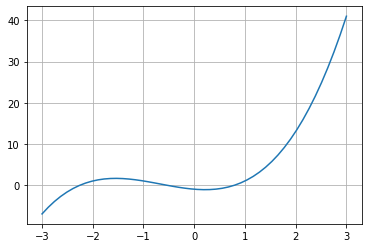

In [9]:
xr=linspace(-3,3)
yr=[f(x) for x in xr]
plot(xr,yr)
grid()

In [10]:
newton(f,df,-2),newton(f,df,0),newton(f,df,1)

(-2.2469796037174667, -0.5549581320873712, 0.8019377358048383)

In [11]:
#7 Monte-Carlo unit sphere x**2+y**2<1
#volume
N=1000
n=0
S=2*2*2*2
for i in range(N):
    x1=random.uniform(-1,1)
    x2=random.uniform(-1,1)
    x3=random.uniform(-1,1)
    x4=random.uniform(-1,1)
    if (x1**2+x2**2+x3**2+x4**2<1):
        n=n+1
S1=S*n/N
error=sqrt(S1*(S-S1)/N)
S1,S1-pi**2/2,error

(4.64, -0.2948022005446793, 0.22958745610333328)

In [12]:
#8 area
N=100000
n=0
S=2*2
for i in range(N):
    x1=random.uniform(-1,1)
    x2=random.uniform(-1,1)
    abs(x1)<1
    abs(x2)<1
    if (x1**2+(1/2)*x2**2-1):
        n=n+1
S1=S*n/N
S1

4.0

In [13]:
#9
def f(x):
    return sin(x)
def midpoint(f,a,b,n):
    xs=linspace(a,b,n)
    h=xs[1]-xs[0]
    xmid=(xs[:-1]+xs[1:])/2
    fs=[f(x) for x in xmid]
    return h*sum(fs)
midpoint(lambda x: sin(x),0,1,10),-cos(1)+cos(0)

(0.4599342493155143, 0.45969769413186023)

In [14]:
error1=midpoint(lambda x:sin(x),0,1,100)+cos(1)-cos(0)
error2=midpoint(lambda x:sin(x),0,1,200)+cos(1)-cos(0)
error1/error2
# so p=2

4.040515118123617

In [15]:
#10 Simpson's integration method
def trapezoidal(a,b,f,n):
    h=(b-a)/n
    xs=linspace(a,b,n+1)
    fs=[f(x) for x in xs]
    return sum(fs)*h-f(a)*h/2-f(b)*h/2
def simpsons(f,a,b,n):
    return (trapezoidal(a,b,f,n)+2*midpoint(f,a,b,n))/3

In [16]:
simpsons(f,0,1,20)

0.4597011444535877

In [17]:
#11 Lagrange interpolation
def pi(x,i,xs):
    xi=xs[i]
    res=1
    for xj in xs:
        if xj != xs:
            res=res*(x-xj)*(xi-xj)
    return res

In [18]:
def lagrange(x,ys,xs):
    res=0
    for i in range(len(ys)):
        res=res+ys[i]*pi(x,i,xs[:])
    return res

In [19]:
xs=[1,2,3,4,5]
ys=[10,98,426,1252,2930]
lagrange(6,ys,xs)

0

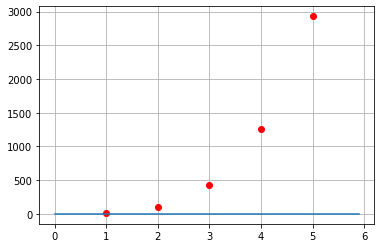

In [20]:
xdense = arange(0,6,0.1)
plot(xs, ys, "ro") 
plot(xdense,lagrange(xdense,ys,xs))
grid()

In [34]:
#12
basis= [lambda x: sin(x),
       lambda x: cos(x),
       lambda x: sin(2*x),
       lambda x: cos(2*x)]
def findfitWithBasis(m,xs,ys):
    A = zeros([m+1,m+1])
    b = zeros(m+1)
    for k in range(m+1):
        b[k] = sum(ys*basis[k](xs)) # change here
        for j in range(m+1):
            A[k,j] = sum(basis[k](xs)*basis[j](xs)) # and here
    a = linalg.solve(A,b)
    def fit(x):
        res = 0
        for i in range(m+1):
            res = res + a[i]*basis[i](x)
        return res
    return fit    

xi = arange(1,6)
yi = array([0,3,-2,-5,3])
ft=findfitWithBasis(3,xi,yi)

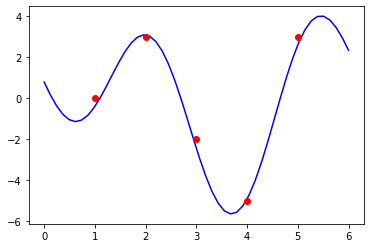

In [22]:
xs = linspace(0,6)
ys = list(map(ft,xs))
plot(xs,ys,'b')
plot(xi,yi,'or')

In [23]:
#13 Euler Method
def F(x,y):
    return sin(4*x)-y

In [24]:
def exact(x):
    return exp(sin(4*x)/4)

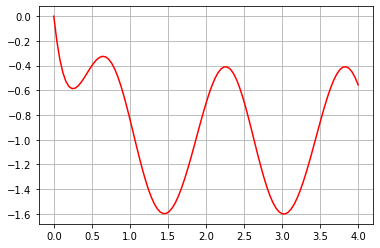

In [25]:
n = 100 # number of jumps
a = 0
b = 4
xs = linspace(a,b,n+1)
h = xs[4]-xs[0]
ys = zeros(n+1) # template for the values of y(x) at xs
ys[0] = 1 # starting point
for i in range(n): # n jumps
    ys[i+1] = ys[i]+h*F(xs[i],ys[i])
zs = [exact(x) for x in xs]
plot(xs,ys-zs,"r")
grid()

In [26]:
#14
import scipy.integrate
?scipy.integrate.quad

In [27]:
result = scipy.integrate.quad(lambda x: 1/(2+sin(x)),0,2)
result

(0.7491454106791013, 8.31718483728207e-15)

In [28]:
#15
def rotate(A):
    return np.rot90(A,3)
B=array([[1,2,3],[4,5,6],[7,8,9]])
rotate(B)

array([[7, 4, 1],
       [8, 5, 2],
       [9, 6, 3]])

In [29]:
#16
def result(N): 
    for num in range(N):  
            if num % 3 == 0 and num % 5 == 0: 
                print(str(num) + " ", end = "")        
            else: 
                pass
result(10000)

0 15 30 45 60 75 90 105 120 135 150 165 180 195 210 225 240 255 270 285 300 315 330 345 360 375 390 405 420 435 450 465 480 495 510 525 540 555 570 585 600 615 630 645 660 675 690 705 720 735 750 765 780 795 810 825 840 855 870 885 900 915 930 945 960 975 990 1005 1020 1035 1050 1065 1080 1095 1110 1125 1140 1155 1170 1185 1200 1215 1230 1245 1260 1275 1290 1305 1320 1335 1350 1365 1380 1395 1410 1425 1440 1455 1470 1485 1500 1515 1530 1545 1560 1575 1590 1605 1620 1635 1650 1665 1680 1695 1710 1725 1740 1755 1770 1785 1800 1815 1830 1845 1860 1875 1890 1905 1920 1935 1950 1965 1980 1995 2010 2025 2040 2055 2070 2085 2100 2115 2130 2145 2160 2175 2190 2205 2220 2235 2250 2265 2280 2295 2310 2325 2340 2355 2370 2385 2400 2415 2430 2445 2460 2475 2490 2505 2520 2535 2550 2565 2580 2595 2610 2625 2640 2655 2670 2685 2700 2715 2730 2745 2760 2775 2790 2805 2820 2835 2850 2865 2880 2895 2910 2925 2940 2955 2970 2985 3000 3015 3030 3045 3060 3075 3090 3105 3120 3135 3150 3165 3180 3195 3210 

In [30]:
#17
for num in range(1,1000):
    prime = True
    for i in range(2,num):
        if (num%i==0):
            prime = False
    if prime:
       print(num)

1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997


In [31]:
#18
from itertools import product, islice
 
 
def expr(p):
    return "{}1{}2{}3{}4{}5{}6{}7{}8{}9".format(*p)
 
 
def gen_expr():
    op = ['+', '-', '']
    return [expr(p) for p in product(op, repeat=9) if p[0] != '+']
 
 
def all_exprs():
    values = {}
    for expr in gen_expr():
        val = eval(expr)
        if val not in values:
            values[val] = 1
        else:
            values[val] += 1
    return values
 
 
def sum_to(val):
    for s in filter(lambda x: x[0] == val, map(lambda x: (eval(x), x), gen_expr())):
        print(s)
 
 
def max_solve():
    print("Sum {} has the maximum number of solutions: {}".
          format(*max(all_exprs().items(), key=lambda x: x[1])))
 
 
def min_solve():
    values = all_exprs()
    for i in range(123456789):
        if i not in values:
            print("Lowest positive sum that can't be expressed: {}".format(i))
            return
 
 
def highest_sums(n=10):
    sums = map(lambda x: x[0],
               islice(sorted(all_exprs().items(), key=lambda x: x[0], reverse=True), n))
    print("Highest Sums: {}".format(list(sums)))
 
 
sum_to(100)
max_solve()
min_solve()
highest_sums()

(100, '-1+2-3+4+5+6+78+9')
(100, '1+2+3-4+5+6+78+9')
(100, '1+2+34-5+67-8+9')
(100, '1+23-4+5+6+78-9')
(100, '1+23-4+56+7+8+9')
(100, '12+3+4+5-6-7+89')
(100, '12+3-4+5+67+8+9')
(100, '12-3-4+5-6+7+89')
(100, '123+4-5+67-89')
(100, '123+45-67+8-9')
(100, '123-4-5-6-7+8-9')
(100, '123-45-67+89')
Sum 9 has the maximum number of solutions: 46
Lowest positive sum that can't be expressed: 211
Highest Sums: [123456789, 23456790, 23456788, 12345687, 12345669, 3456801, 3456792, 3456790, 3456788, 3456786]


In [32]:
#19
?scipy.integrate.dblquad

In [33]:
f=lambda y,x: sin(2*x**2+y**2)
scipy.integrate.dblquad(f,0,2,lambda x :0,lambda x:1)

(0.5862214065238655, 1.3743770625476796e-14)